In [1]:
import pandas as pd

We are going to use BTC/USDT data from the Feb 06, 2024 data in this notebook.

In [2]:
df = pd.read_csv('BTCUSDT-bookTicker-2024-02-06.csv')

In [3]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,1707177600000,1707177600004
1,3939719410110,43233.4,0.846,43233.6,10.399,1707235233178,1707235233182
2,3936653543872,42692.9,0.584,42693.0,5.645,1707177600000,1707177600004
3,3939719410130,43233.4,0.846,43233.6,10.636,1707235233178,1707235233182
4,3936653543878,42692.9,0.562,42693.0,5.645,1707177600000,1707177600004


In [4]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], unit='ms')

In [5]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004
1,3939719410110,43233.4,0.846,43233.6,10.399,2024-02-06 16:00:33.178,1707235233182
2,3936653543872,42692.9,0.584,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004
3,3939719410130,43233.4,0.846,43233.6,10.636,2024-02-06 16:00:33.178,1707235233182
4,3936653543878,42692.9,0.562,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004


In [6]:
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [7]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004
1,3939719410110,43233.4,0.846,43233.6,10.399,2024-02-06 16:00:33.178,2024-02-06 16:00:33.182
2,3936653543872,42692.9,0.584,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004
3,3939719410130,43233.4,0.846,43233.6,10.636,2024-02-06 16:00:33.178,2024-02-06 16:00:33.182
4,3936653543878,42692.9,0.562,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004


In [8]:
grouped = df.groupby([df['transaction_time'].dt.hour])

In [9]:
grouped['update_id'].count()

transaction_time
0      883747
1      955074
2     1165062
3      867975
4      849887
5      814240
6      829777
7      809152
8     1451969
9     1123615
10    1620430
11    1307003
12    1283219
13    1412374
14    1482887
15    1855624
16    1921017
17    1283150
18    1077940
19    1015262
20    1160909
21     894236
22     663772
23     811752
Name: update_id, dtype: int64

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

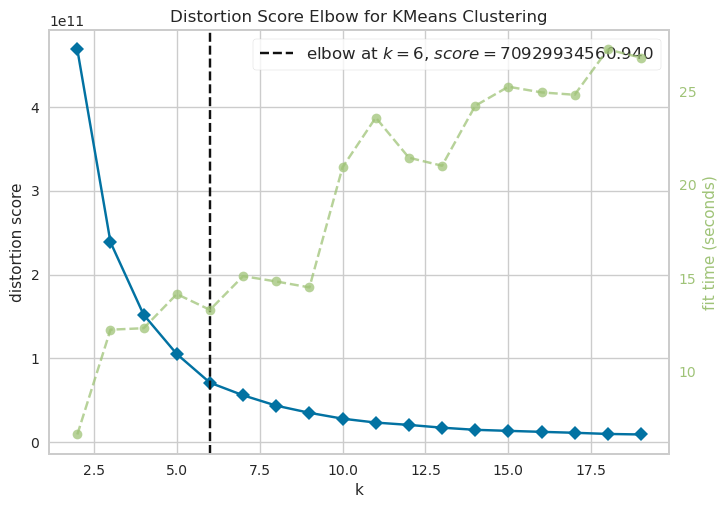

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
kmeans = KMeans(random_state=42, n_init="auto")
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(df[['best_bid_price', 'best_bid_qty', 'best_ask_price', 'best_ask_qty']])
visualizer.show()

In [12]:
kmeans = KMeans(n_clusters=6).fit(df[['best_bid_price', 'best_bid_qty', 'best_ask_price', 'best_ask_qty']])

In [13]:
kmeans.cluster_centers_

array([[4.26552325e+04, 6.12373750e+00, 4.26553380e+04, 6.25055782e+00],
       [4.31633497e+04, 6.06835060e+00, 4.31634537e+04, 6.33142283e+00],
       [4.28954736e+04, 6.22920255e+00, 4.28955782e+04, 6.61343705e+00],
       [4.32782291e+04, 5.39398514e+00, 4.32783378e+04, 5.64160273e+00],
       [4.30352959e+04, 5.96463267e+00, 4.30354026e+04, 6.29236017e+00],
       [4.27762295e+04, 6.54906617e+00, 4.27763346e+04, 6.81416950e+00]])

In [14]:
import matplotlib.pyplot as plt

Provide total best bid by multiplying price into quantity.

In [15]:
df['best_bid_total'] = df['best_bid_price'] * df['best_bid_qty']

We are going to see the distribution of the total best bid over time.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

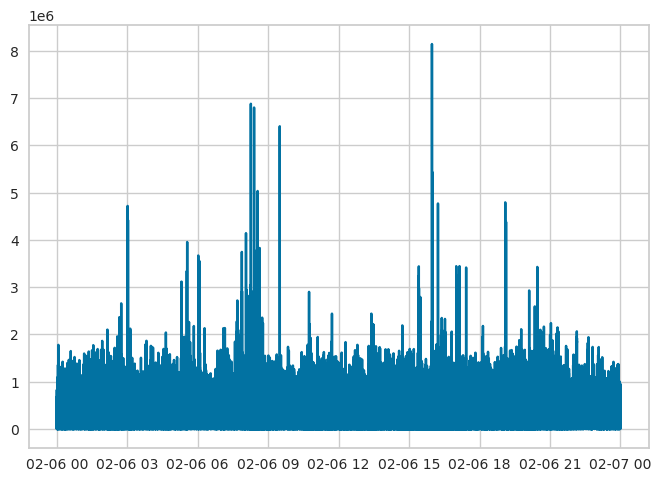

In [16]:
df_group_by_timestamp = df.groupby('transaction_time').mean().reset_index()
plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_bid_total'])

The mean distribution contains peaks which we need to investigate more and see why they are happing?

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

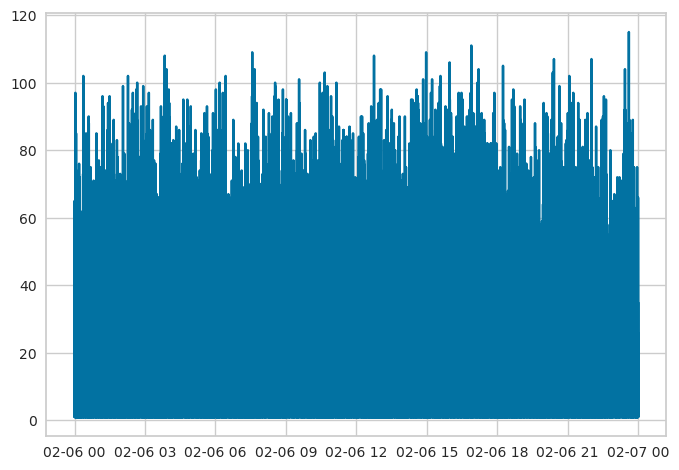

In [17]:
df_group_by_timestamp = df.groupby('transaction_time').count().reset_index()
plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_bid_total'])

The count distribution, unlike the mean, doesn't contain any peak which shows these peak shouldn't happen because of low number of transactions.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

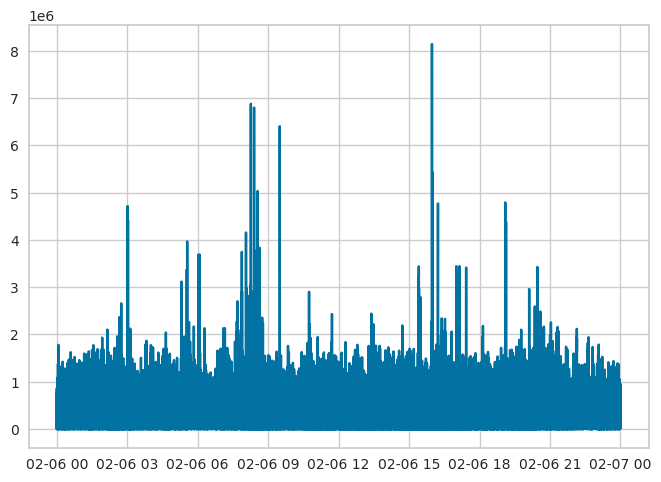

In [18]:
df_group_by_timestamp = df.groupby('transaction_time').median().reset_index()
plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_bid_total'])

Based on the above diagrams, it seems we have some transaction which is not normal in our context. I am going to use histogram and see the distribution of the transactions value.


In [20]:
import numpy as np

(array([2.6822833e+07, 6.6013500e+05, 3.9205000e+04, 1.1214000e+04,
        2.3860000e+03, 3.3190000e+03, 3.5000000e+01, 8.5800000e+02,
        3.5000000e+01, 5.3000000e+01]),
 array([4.25649000e+01, 8.19934674e+05, 1.63982678e+06, 2.45971889e+06,
        3.27961100e+06, 4.09950311e+06, 4.91939522e+06, 5.73928733e+06,
        6.55917944e+06, 7.37907155e+06, 8.19896366e+06]),
 <BarContainer object of 10 artists>)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

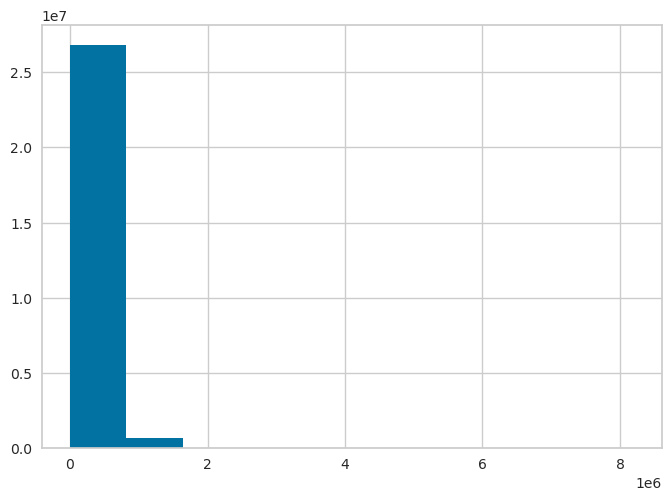

In [25]:
counts, bins = np.histogram(df['best_bid_total'])

plt.hist(bins[:-1], bins, weights=counts)

In [26]:
bins, counts

(array([4.25649000e+01, 8.19934674e+05, 1.63982678e+06, 2.45971889e+06,
        3.27961100e+06, 4.09950311e+06, 4.91939522e+06, 5.73928733e+06,
        6.55917944e+06, 7.37907155e+06, 8.19896366e+06]),
 array([26822833,   660135,    39205,    11214,     2386,     3319,
              35,      858,       35,       53]))

Based on the histogram, it seems we have some actual outlier which we need to investigate. Let use KMeans and see its clustering with these outliers.

In [30]:
labels = kmeans.predict(df[['best_bid_price', 'best_bid_qty', 'best_ask_price', 'best_ask_qty']])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

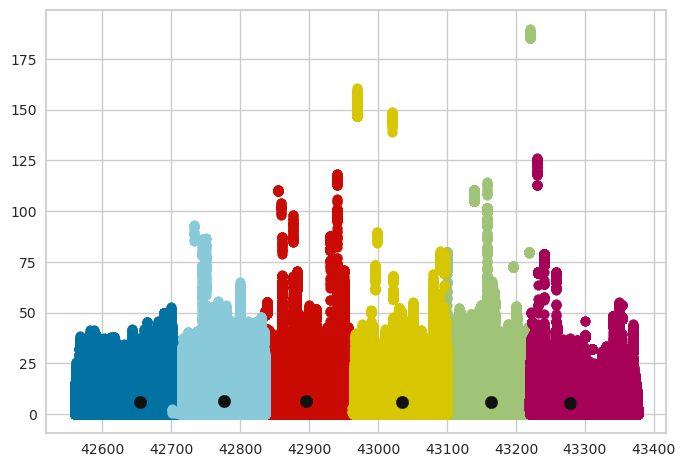

In [40]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[labels == i]['best_bid_price'] , df[labels == i]['best_bid_qty'] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

It seems data is clustered using price, which is predictable because the only feature we have is price.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

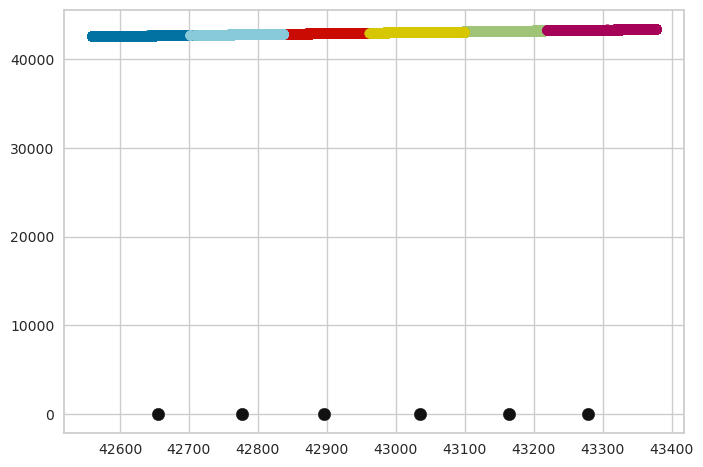

In [41]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[labels == i]['best_bid_price'] , df[labels == i]['best_ask_price'] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')